<a href="https://colab.research.google.com/github/JakeSilva5/Data-Science/blob/JakeSilva5-patch-1/DS220_Project_2_by_Jake_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project 2 for DS220 by Jake Silva**

A data set that caught my eye was crime rates of all 50 states in the United States of America from 1960-2003. I am going to analyize the raw data, and provide insight data scientists can draw from this data set!

[crime_rates.csv](https://psu.instructure.com/courses/2211833/files/139176768/download?download_frd=1)

**Questions and Main Ideas I will Analyize in Multiple Queries:**
1.   Initial Data Examination/Cleaning
2. Visualize and Compare Crime in 1960 vs 2003
3. Figure out safest and most dangerous states with respect to crime
4. Compare Pennsylvania's Rates vs the rest of the United States
5. Looking at Means and Standard Deviations
6. Examining Correlation and Regression




First of all, lets import the Data Science modules we will be using (Pandas,NumPy, and Matplotlib) as well as our data set.

In [ ]:
from datascience import *
import numpy as np
import pandas as pd


#setting our chart settings to our preference
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
crime = pd.read_csv("crime_rates.csv")
crime

,State,Year,Population,Murder Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
0,Alaska,1960,226167,10.2,28.299999,45.099998,1544.900024,332.100006,970.500000,242.300003
1,Alaska,1961,234000,11.5,12.400000,51.700001,1540.599976,380.799988,950.000000,209.800003
2,Alaska,1962,246000,4.5,13.800000,54.500000,1564.599976,351.600006,985.400024,227.600006
3,Alaska,1963,248000,6.5,22.200001,66.099998,1952.800049,381.500000,1213.699951,357.700012
4,Alaska,1964,250000,10.4,21.200001,96.000000,2016.000000,443.600006,1218.400024,354.000000
...,...,...,...,...,...,...,...,...,...,...
2195,Wyoming,1999,480000,2.3,15.400000,186.199997,3225.199951,489.799988,2611.100098,124.300003
2196,Wyoming,2000,493782,2.4,14.200000,217.500000,3031.500000,420.799988,2494.600098,116.000000
2197,Wyoming,2001,494423,1.8,17.000000,207.500000,3260.399902,501.799988,2617.800049,140.800003
2198,Wyoming,2002,498830,3.0,18.600000,222.100006,3306.500000,490.700012,2666.800049,148.899994


Lets see what we are working with...

In [ ]:
columns = crime.columns
print(columns) #displays name of all the columns for our dataset
dimension = crime.shape
dimension #displays the shape of the data (# of rows, # of columns)

Index(['State', 'Year', 'Population', 'Murder Rate', 'Robbery Rate',
       'Aggraveted Assault Rate', 'Property Crime Rate', 'Burglary Rate',
       'Larceny & Theft Rate', 'Motor Vehicle Theft Rate'],
      dtype='object')


(2200, 10)

As you can see, our column headers are 'State', 'Year', 'Population', 'Murder Rate', 'Robbery Rate',
       'Aggraveted Assault Rate', 'Property Crime Rate', 'Burglary Rate',
       'Larceny & Theft Rate', 'Motor Vehicle Theft Rate'
and we are working with a table of 2200 rows and 10 columns.

Before we begin analyzing our data, we need to clean it. My method of cleaning it will be to check if null values are present in the data frame and check for duplicates, then drop those rows.

In [ ]:
crime.isnull().sum()

State                       0
Year                        0
Population                  0
Murder Rate                 0
Robbery Rate                0
Aggraveted Assault Rate     0
Property Crime Rate         0
Burglary Rate               0
Larceny & Theft Rate        0
Motor Vehicle Theft Rate    0
dtype: int64

As we can see, the data is already clean so we don't have to manipulate it. If there were null values, I would do crime.dropna(how='all',subset=['YEAR'], inplace=True) to clear all the null values, and use to the above command to check.

In [ ]:
crime.duplicated().sum()

0

The code has no duplicated values, so lets use the data to answer some questions!

First, let's visualize the relationship between population and murder rates between 1960 and 2003 across all 50 states.

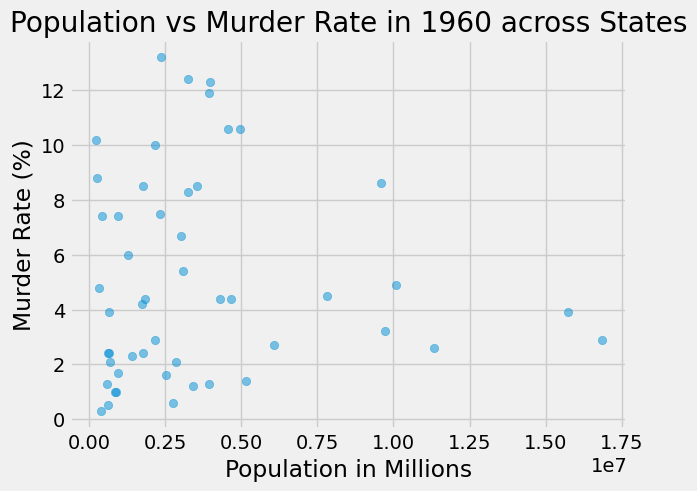

In [ ]:
#Grab our dataframes
gross_pop_1960 = crime.loc[crime['Year'] == 1960, 'Population']
gross_murder_1960 = crime.loc[crime['Year'] == 1960, 'Murder Rate']
#Create graph


plots.scatter(gross_pop_1960, gross_murder_1960, alpha=0.5)
plots.title('Population vs Murder Rate in 1960 across States')
plots.xlabel('Population in Millions')
plots.ylabel('Murder Rate (%)')
plots.show()


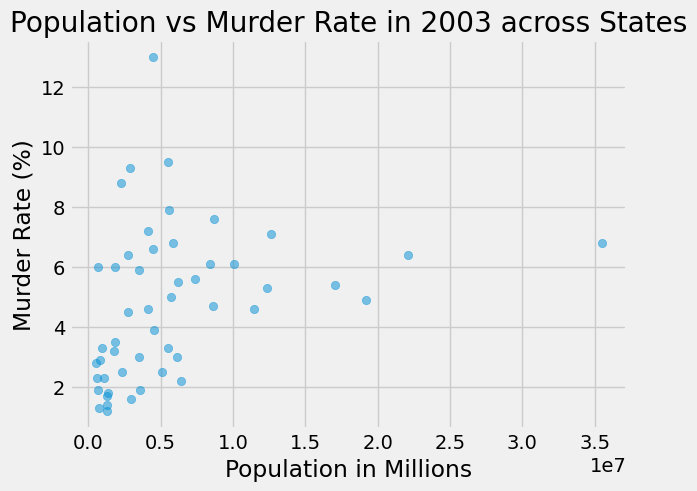

In [ ]:
#Grab our dataframes
gross_pop_2003 = crime.loc[crime['Year'] == 2003, 'Population']
gross_murder_2003 = crime.loc[crime['Year'] == 2003, 'Murder Rate']
#Create graph


plots.scatter(gross_pop_2003, gross_murder_2003, alpha=0.5)
plots.title('Population vs Murder Rate in 2003 across States')
plots.xlabel('Population in Millions')
plots.ylabel('Murder Rate (%)')
plots.show()

As you can see, the graphs look pretty similar overall; however, the 1960 seemed to have a slightly higher murder rate despite the increase in population.

Now that we see the overall patteren, lets see what state is recently the most safe, and the most dangerous!

In [ ]:
crime_2003 = crime[crime['Year'] == 2003].copy()
avg_murder_2003 = crime_2003.groupby('State')['Murder Rate'].mean()
print("The average murder rates in 2003 for each state")
print(avg_murder_2003)

The average murder rates in 2003 for each state
State
Alabama            6.6
Alaska             6.0
Arizona            7.9
Arkansas           6.4
California         6.8
Colorado           3.9
Connecticut        3.0
Delaware           2.9
Florida            5.4
Georgia            7.6
Hawaii             1.7
Idaho              1.8
Illinois           7.1
Indiana            5.5
Iowa               1.6
Kansas             4.5
Kentucky           4.6
Louisiana         13.0
Maine              1.2
Maryland           9.5
Massachuse         2.2
Michigan           6.1
Minnesota          2.5
Mississippi        9.3
Missouri           5.0
Montana            3.3
Nebraska           3.2
Nevada             8.8
New Hampshire      1.4
New Jersey         4.7
New Mexico         6.0
New York           4.9
North Carolina     6.1
North Dakota       1.9
Ohio               4.6
Oklahoma           5.9
Oregon             1.9
Pennsylvania       5.3
Rhode Isla         2.3
South Carolina     7.2
South Dakota       1.3
Ten

To visualize this, lets graph the most dangerous and safest states! For the sake of space, we will graph the top 7 respectively.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Maine'),
  Text(1, 0, 'South Dakota'),
  Text(2, 0, 'New Hampshire'),
  Text(3, 0, 'Iowa'),
  Text(4, 0, 'Hawaii')])

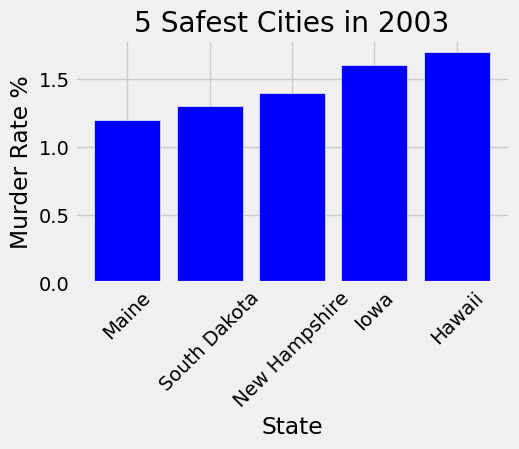

In [ ]:
safest = avg_murder_2003.nsmallest(5)
plots.figure(figsize=(5,3))
plots.bar(safest.index,safest.values, color='blue')
plots.title('5 Safest Cities in 2003')
plots.xlabel('State')
plots.ylabel('Murder Rate %')
plots.xticks(rotation=45, ha='center')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Louisiana'),
  Text(1, 0, 'Maryland'),
  Text(2, 0, 'Mississippi'),
  Text(3, 0, 'Nevada'),
  Text(4, 0, 'Arizona')])

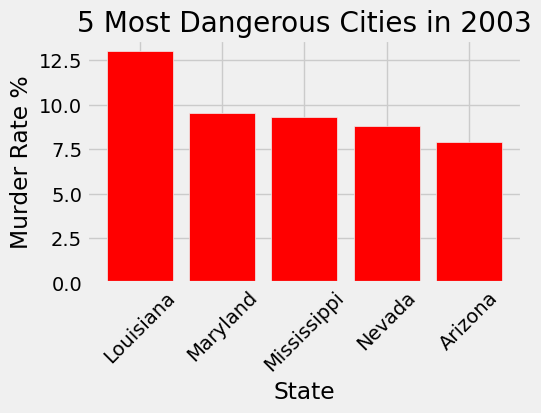

In [ ]:
dangerous = avg_murder_2003.nlargest(5)
plots.figure(figsize=(5,3))
plots.bar(dangerous.index,dangerous.values, color='red')
plots.title('5 Most Dangerous Cities in 2003')
plots.xlabel('State')
plots.ylabel('Murder Rate %')
plots.xticks(rotation=45, ha='center')

To see the true difference between the top and low percentile, lets view it together.


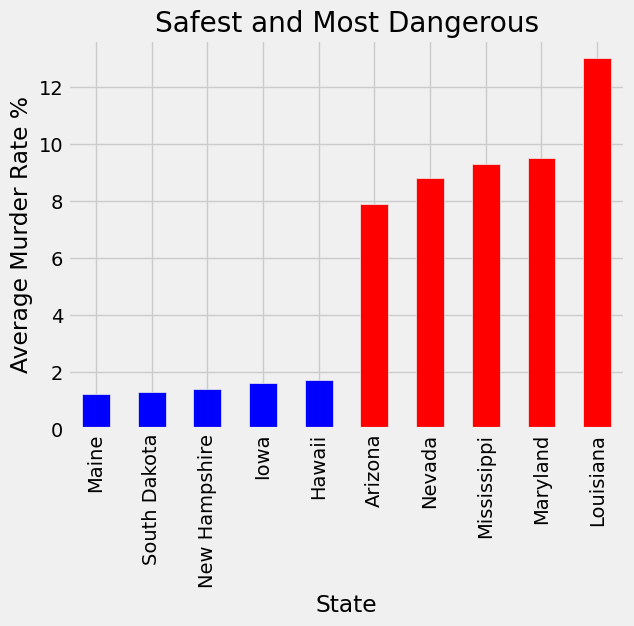

In [ ]:
combined = pd.concat([dangerous, safest])
combined = combined.sort_values()
combined.plot(kind='bar', color=['red' if x in dangerous.index else 'blue' for x in combined.index])

plots.title("Safest and Most Dangerous")
plots.ylabel('Average Murder Rate %')
plots.show()

In 2003, its stastically proven Maine was the safest state from the crime of Murder. On the contrary, I wouldn't want to live in Louisiana in 2003 regarding the murder rate.

Next, lets examine specific crime data with 2 parameters. Perhaps at home (Pennsylvania) during the year Penn State who a National championship in football (1986).

In [ ]:
pa_1986_table = crime[(crime['Year'] == 1986) & (crime['State'] == 'Pennsylvania')].copy()
selected_columns = ['Robbery Rate', 'Aggraveted Assault Rate', 'Property Crime Rate', 'Burglary Rate', 'Larceny & Theft Rate', 'Motor Vehicle Theft Rate']

#Getting the mean for every column through simple for loop
pa_1986_values = {}
for column in selected_columns:
    pa_1986_values[column] = pa_1986_table[column].mean()
pa_1986_data = pd.Series(pa_1986_values)

print(pa_1986_data)

Robbery Rate                 152.100006
Aggraveted Assault Rate      175.800003
Property Crime Rate         2743.300049
Burglary Rate                734.799988
Larceny & Theft Rate        1654.099976
Motor Vehicle Theft Rate     354.399994
dtype: float64


Now lets compare that specific data to average the rest from the US, from the entire timeframe 1960-2003 (excluding Pennsylvania in 1986)!

In [ ]:
average_values = {}
#Remove PA in 1986
other_states = average_other_states = crime[(crime['State'] != 'Pennsylvania') & (crime['Year'] == 1986)]
selected_columns = ['Robbery Rate', 'Aggraveted Assault Rate', 'Property Crime Rate', 'Burglary Rate', 'Larceny & Theft Rate', 'Motor Vehicle Theft Rate']

#Getting the mean for every column through simple for loop
for column in selected_columns:
    average_values[column] = other_states[column].mean()
rest_of_US = pd.Series(average_values)

print(rest_of_US)

Robbery Rate                 141.820406
Aggraveted Assault Rate      277.685714
Property Crime Rate         4531.997942
Burglary Rate               1205.240824
Larceny & Theft Rate        2943.989783
Motor Vehicle Theft Rate     382.769388
dtype: float64


Lets look at them together

<Figure size 500x300 with 0 Axes>

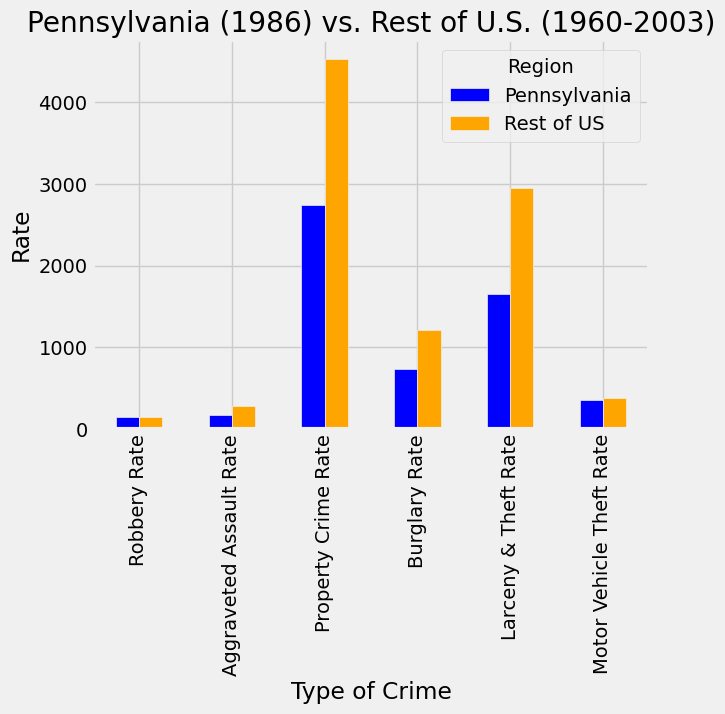

In [ ]:
crime_data = pd.DataFrame({'Pennsylvania': pa_1986_data, 'Rest of US': rest_of_US})

# Plot the grouped bar chart
plots.figure(figsize=(5, 3))
crime_data.plot(kind='bar', color=['blue', 'orange'])
#plots.yticks(range(0, int(max(crime_data.max()) + 500), 500))
plots.title('Pennsylvania (1986) vs. Rest of U.S. (1960-2003)')
plots.xlabel('Type of Crime')
plots.ylabel('Rate')
plots.legend(title='Region')

# Show the plot
plots.show()

Using the chart, we compare and visualize the data to draw inferences!
For example, Crime against Property in much more prevalent in the rest of the United State across time, and Pennsylvania in 1986 on average!

Next, lets look at all the of the data related to crimes.

In [ ]:
Everything_Average = {}
selected_columns2 = ['Murder Rate','Robbery Rate', 'Aggraveted Assault Rate', 'Property Crime Rate', 'Burglary Rate', 'Larceny & Theft Rate', 'Motor Vehicle Theft Rate']
Crime_Only_Table = crime[selected_columns2]
Crime_Only_Table




,Murder Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
0,10.2,28.299999,45.099998,1544.900024,332.100006,970.500000,242.300003
1,11.5,12.400000,51.700001,1540.599976,380.799988,950.000000,209.800003
2,4.5,13.800000,54.500000,1564.599976,351.600006,985.400024,227.600006
3,6.5,22.200001,66.099998,1952.800049,381.500000,1213.699951,357.700012
4,10.4,21.200001,96.000000,2016.000000,443.600006,1218.400024,354.000000
...,...,...,...,...,...,...,...
2195,2.3,15.400000,186.199997,3225.199951,489.799988,2611.100098,124.300003
2196,2.4,14.200000,217.500000,3031.500000,420.799988,2494.600098,116.000000
2197,1.8,17.000000,207.500000,3260.399902,501.799988,2617.800049,140.800003
2198,3.0,18.600000,222.100006,3306.500000,490.700012,2666.800049,148.899994


Let's examine the mean for this data:

In [ ]:
selected_columns2 = ['Murder Rate','Robbery Rate', 'Aggraveted Assault Rate', 'Property Crime Rate', 'Burglary Rate', 'Larceny & Theft Rate', 'Motor Vehicle Theft Rate']
Crime_Only_Table = crime[selected_columns2]

CrimeMeans = {}
#Getting the mean for every column through simple for loop
for column in selected_columns2:
    CrimeMeans[column] = Crime_Only_Table[column].mean()
CrimeMeans_result = pd.Series(CrimeMeans)

print(CrimeMeans_result)



Murder Rate                    6.375045
Robbery Rate                 115.551000
Aggraveted Assault Rate      221.071318
Property Crime Rate         3736.734635
Burglary Rate                965.005909
Larceny & Theft Rate        2412.479273
Motor Vehicle Theft Rate     359.230818
dtype: float64


Let's Calculate the Standard Deviation of all the crimes:

In [ ]:
selected_columns2 = ['Murder Rate','Robbery Rate', 'Aggraveted Assault Rate', 'Property Crime Rate', 'Burglary Rate', 'Larceny & Theft Rate', 'Motor Vehicle Theft Rate']
Crime_Only_Table = crime[selected_columns2]

CrimeSTDs = {}
#Getting the std for every column through simple for loop
for column in selected_columns2:
    CrimeSTDs[column] = Crime_Only_Table[column].std()
CrimeSTDs_result = pd.Series(CrimeSTDs)

print(CrimeSTDs_result)

Murder Rate                    3.758246
Robbery Rate                  98.880845
Aggraveted Assault Rate      151.975028
Property Crime Rate         1454.854572
Burglary Rate                446.376487
Larceny & Theft Rate         955.270054
Motor Vehicle Theft Rate     207.745286
dtype: float64


The standard deviations tell us the average amount of variability in the dataset. A low standard deviation means values in the data tend to be close to the mean, and a high standard deviation means values tend to be further away from the mean.

Finally, lets draw some more advanced calculations on the data. For this query, I will use the Robbery Rate and Aggraveted Assault Rate from 1960-2003. To keep things simple, I am going to create a new table, assign my two parameters to x and y.

In [ ]:
crime_table = Table.read_table("crime_rates.csv")
x = crime_table.column('Robbery Rate')
y = crime_table.column('Aggraveted Assault Rate')


I wonder if their is a correlation coefficient between the Robbery Rate and Aggravated Assault Rate... Let's calculate the correlation coefficient and find out. A correlation coefficent (CC) describes the strength of a linear relationship between two varibale in the range of -1 and 1.

*   CC > 0 --> positive relationship
*   CC < 0 --> negative relationship
*   CC = 0 --> No relationship

To find the strength/association of the variables, take the absolute value of CC. The higher the number, the stronger the relationship. The lower the number, the weaker the relationship.



The formula for the correlation coefficient is covariance(x,y)/(standard dev. of X * standard dev. of Y)

In [ ]:
#Solve for numerator
mean_robbery = np.mean(x)
mean_assault = np.mean(y)

dev_robbery = x - mean_robbery
dev_assault = y - mean_assault

covariance = np.mean(dev_robbery * dev_assault)

#Solve for denominator
dev_x = np.std(x)
dev_y = np.std(y)

#Solve Correlation Coefficient
CC = covariance / (dev_x * dev_y)
print(CC)





0.65892924562


Our CC value is about 0.659. This indicates there is a strong positive relationship between Robbery Rate and Aggravated Assault Rate from 1960 - 2003

Lets go one more step forward and look at the Linear Regression Line modeled as: $y = f(x) = r_{X,Y} \frac{\sigma_Y}{\sigma_X} x + \mu_Y - r_{X,Y} \frac{\sigma_Y}{\sigma_X} \mu_X$

Text(0.5, 0, 'Robbery Rate')

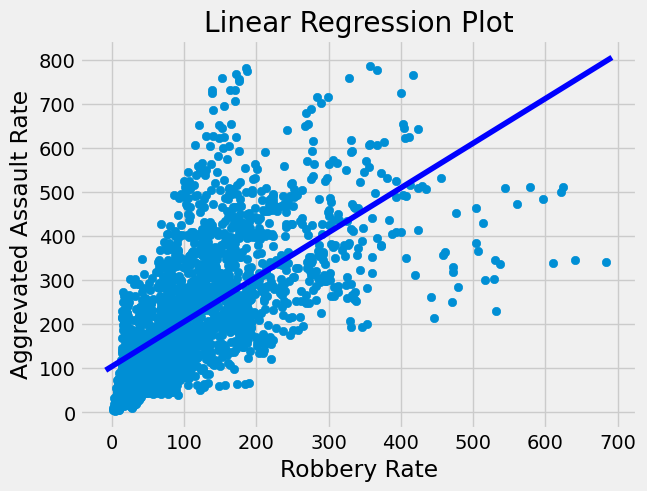

In [ ]:
#Get Standard Deviations
std_x = np.std(x)
std_y = np.std(y)
#Calculate Slope (y = mx + b)
rise_over_run = std_y / std_x
slope = rise_over_run * CC
intercept = mean_assault - slope * mean_robbery
#plot
plots.scatter(x,y)
regline_x_values = np.arange(min(x)-10, max(x)+10, 5)
regline_y_values = regline_x_values * slope + intercept
plots.plot(regline_x_values, regline_y_values, 'b')
plots.title("Linear Regression Plot")
plots.ylabel('Aggrevated Assault Rate')
plots.xlabel('Robbery Rate')

The linear regression looks like it matches up with the strong positive relationship!

**In all, there is numerous ways data similar to this can be manipulated, and people can draw/make important information to make decisions. **